# Step 1: Install and import modules

In [2]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [3]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in links: https://download.pytorch.org/whl/torch_stable.html


ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cpu (from versions: 2.0.0, 2.0.0+cpu, 2.0.0+cu117, 2.0.0+cu118, 2.0.1, 2.0.1+cpu, 2.0.1+cu117, 2.0.1+cu118, 2.1.0, 2.1.0+cpu, 2.1.0+cu118, 2.1.0+cu121)
ERROR: No matching distribution found for torch==1.7.1+cpu


  Obtaining dependency information for easyocr from https://files.pythonhosted.org/packages/cb/0e/09bafec31db720e796d3f5b0814c37c5fdb59dcd35a2c6c6b1c774b09646/easyocr-1.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for torchvision>=0.5 from https://files.pythonhosted.org/packages/20/ac/ab6f42af83349e679b03c9bb18354740c6b58b17dba329fb408730230584/torchvision-0.16.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/e3/10/31b27a7473043eb5317f698ede00e7e129b2de378903bfe0bb4d785a7baf/opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/ce/d0/a3f60c9f57ed295b3076e4acdb29a37bbd8823452562ab2ad51b03d6f377/scikit_image-0.22.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Shapely from https://files.pythonhosted.org/packages/9e/39/029c441d8af32ab423b229c

In [4]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2: Image loading and text recognition using EasyOCR

In [27]:
im_1_path = './image/im1.jpeg'
im_2_path = './image/im2.png'
im_3_path = './image/im3.png'


In [9]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [10]:
result = recognize_text(im_1_path)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [11]:
result

[([[82, 38], [180, 38], [180, 68], [82, 68]], 'MAKE TEXT', 0.9608965915033182),
 ([[58, 78], [202, 78], [202, 104], [58, 104]],
  'STAND OUT FROM',
  0.8574756634150013),
 ([[68, 116], [192, 116], [192, 144], [68, 144]],
  'BACKGROUNDS',
  0.9916567664998269)]

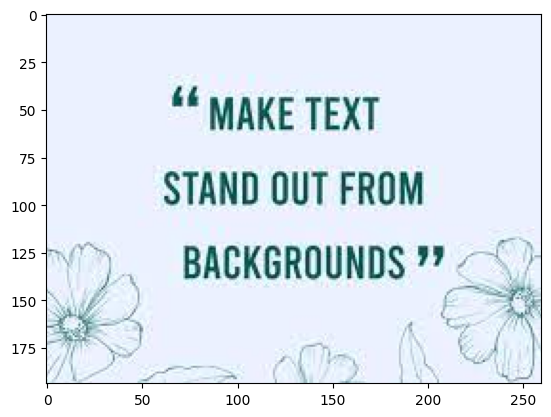

In [26]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

# Step 3: Overlay recognized text on image using OpenCV

In [13]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: MAKE TEXT (Probability: 0.96)
Detected text: STAND OUT FROM (Probability: 0.86)
Detected text: BACKGROUNDS (Probability: 0.99)


<Figure size 640x480 with 0 Axes>

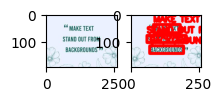

In [20]:
overlay_ocr_text(im_1_path, 'img1')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: It was the best of (Probability: 0.80)
Detected text: times, it was the worst (Probability: 0.76)
Detected text: of times, it was the age (Probability: 0.97)
Detected text: of wisdom; it was the (Probability: 0.87)
Detected text: age of foolishness_ (Probability: 0.96)


<Figure size 640x480 with 0 Axes>

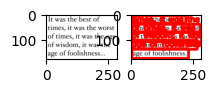

In [28]:
overlay_ocr_text(im_2_path, 'img2')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: This is the first line of (Probability: 0.76)
Detected text: this text example. (Probability: 0.65)
Detected text: This is the second line (Probability: 0.78)
Detected text: of the same text. (Probability: 0.71)


<Figure size 640x480 with 0 Axes>

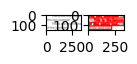

In [29]:
overlay_ocr_text(im_3_path, 'img3')